In [206]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [207]:
!wget -O loan.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2020-06-09 20:13:08--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan.csv’

100%[======================================>] 23,101      --.-K/s   in 0.07s   

2020-06-09 20:13:08 (303 KB/s) - ‘loan.csv’ saved [23101/23101]



In [208]:
data_frame = pd.read_csv("loan.csv")
data_frame.head(10)


,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male
5,7,7,PAIDOFF,1000,30,9/9/2016,10/8/2016,36,college,male
6,8,8,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,male
7,9,9,PAIDOFF,800,15,9/10/2016,9/24/2016,26,college,male
8,10,10,PAIDOFF,300,7,9/10/2016,9/16/2016,29,college,male
9,11,11,PAIDOFF,1000,15,9/10/2016,10/9/2016,39,High School or Below,male


In [209]:
data_frame['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

In [210]:
data_frame.shape

(346, 10)

In [211]:
data_frame['Gender'].value_counts()

male      294
female     52
Name: Gender, dtype: int64

In [212]:
data_frame['education'].value_counts()

High School or Below    151
college                 149
Bechalor                 44
Master or Above           2
Name: education, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f18be908198>]],
      dtype=object)

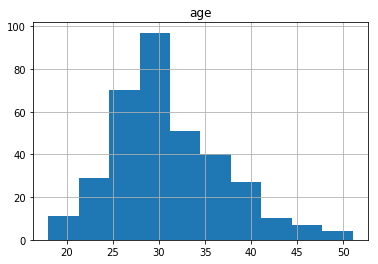

In [213]:
data_frame.hist(column='age',bins=10)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f18be7c1ac8>]],
      dtype=object)

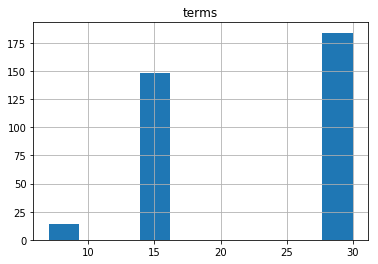

In [214]:
data_frame.hist(column='terms',bins=10)

In [215]:
data_frame.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'loan_status', 'Principal', 'terms',
       'effective_date', 'due_date', 'age', 'education', 'Gender'],
      dtype='object')

In [216]:
data_frame['due_date'] = pd.to_datetime(data_frame['due_date'])
data_frame['effective_date'] = pd.to_datetime(data_frame['effective_date'])
data_frame['dayofweek'] = data_frame['effective_date'].dt.dayofweek
data_frame['weekend'] = data_frame['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)

In [217]:
data_frame['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)

In [218]:
len(data_frame[data_frame.education=='Master or Above'])
F = data_frame[['Principal','terms','age','Gender','weekend','dayofweek']]
F = pd.concat([F,pd.get_dummies(data_frame['education'])], axis=1)
F.drop(['Master or Above'], axis = 1,inplace=True)

In [219]:
X = F
X[0:10]

,Principal,terms,age,Gender,weekend,dayofweek,Bechalor,High School or Below,college
0,1000,30,45,0,0,3,0,1,0
1,1000,30,33,1,0,3,1,0,0
2,1000,15,27,0,0,3,0,0,1
3,1000,30,28,1,1,4,0,0,1
4,1000,30,29,0,1,4,0,0,1
5,1000,30,36,0,1,4,0,0,1
6,1000,30,28,0,1,4,0,0,1
7,800,15,26,0,1,5,0,0,1
8,300,7,29,0,1,5,0,0,1
9,1000,15,39,0,1,5,0,1,0


In [220]:
Y = data_frame['loan_status'].values
Y[0:10]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'], dtype=object)

In [221]:
Y = data_frame['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION'], value=[0,1]).values
Y[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [222]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:10]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  from ipykernel import kernelapp as app


array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.26122054, -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
        -0.26122054,  2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.26122054, -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
         0.12175534, -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
         0.12175534, -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769,  0.8391575 , -0.42056004,  0.82934003,
         0.12175534, -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188, -0.42056004,  0.82934003,
         0.12175534, -0.38170062, -0.87997669,  1.14984679],
       [-1.31458942, -0.95911111, -0.81902922, -0.42056004,  0

In [223]:
#KNN
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X,Y,test_size=0.2,random_state=4)
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros(Ks-1)
ConfusionMx = [];
for n in range(1,Ks):
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train1,y_train1)
    yhat1=neigh.predict(X_test1)
    mean_acc[n-1] = metrics.accuracy_score(y_test1, yhat1)
    std_acc[n-1]=np.std(yhat1==y_test1)/np.sqrt(yhat1.shape[0])
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)


The best accuracy was with 0.7714285714285715 with k= 2


In [225]:
k = 2
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train1,y_train1)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [226]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
X_train2, X_test2, y_train2, y_test2 = train_test_split(X,Y,test_size=0.2,random_state=4)
tree = DecisionTreeClassifier(criterion = "entropy", max_depth = 4)
tree.fit(X_train2,y_train2)
predtree = tree.predict(X_test2)
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test2, predtree))

DecisionTrees's Accuracy:  0.7857142857142857


In [227]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
import graphviz

In [228]:
!pip install pydotplus

In [229]:
!pip install graphviz

In [230]:
#SVM
from sklearn import svm
X_train3, X_test3, y_train3, y_test3 = train_test_split(X,Y,test_size=0.2,random_state=4)
clf = svm.SVC(kernel='rbf')
clf.fit(X_train3, y_train3)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [245]:
y_pred3=clf.predict(X_test3)
y_pred3.shape
X_test3.shape

(70, 9)

In [232]:
from sklearn.metrics import classification_report, confusion_matrix
print (classification_report(y_test3, y_pred3))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84        55
           1       0.36      0.27      0.31        15

   micro avg       0.74      0.74      0.74        70
   macro avg       0.59      0.57      0.57        70
weighted avg       0.72      0.74      0.73        70



In [233]:
from sklearn.metrics import jaccard_similarity_score
print(jaccard_similarity_score(y_test3, y_pred3))

0.7428571428571429


In [234]:
#logisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
X_train4, X_test4, y_train4, y_test4 = train_test_split(X,Y,test_size=0.2,random_state=4)
ModelLR= LogisticRegression(C=0.01,solver='liblinear').fit(X_train4,y_train4)
yhat4 = ModelLR.predict(X_test4)
yhat_prob4 = ModelLR.predict_proba(X_test4)

In [235]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test4, yhat4)
print ("Jaccard: : %.2f" % jaccard_similarity_score(y_test4, yhat4))
from sklearn.metrics import log_loss
log_loss(y_test4, yhat_prob4)
print ("LogLoss: : %.2f" % log_loss(y_test4, yhat_prob4))

Jaccard: : 0.63
LogLoss: : 0.57


In [247]:
!wget -O test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2020-06-09 20:22:19--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘test.csv’

100%[======================================>] 3,642       --.-K/s   in 0s      

2020-06-09 20:22:19 (350 MB/s) - ‘test.csv’ saved [3642/3642]



In [248]:
test_data_frame = pd.read_csv('test.csv')
test_data_frame['due_date'] = pd.to_datetime(test_data_frame['due_date'])
test_data_frame['effective_date'] = pd.to_datetime(test_data_frame['effective_date'])
test_data_frame['dayofweek'] = test_data_frame['effective_date'].dt.dayofweek
test_data_frame['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
test_data_frame['weekend'] = test_data_frame['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
F2 = test_data_frame[['Principal','terms','age','Gender','weekend','dayofweek']]
F2 = pd.concat([F2,pd.get_dummies(test_data_frame['education'])], axis=1)
F2.drop(['Master or Above'], axis = 1,inplace=True)
test_data_frame.head(10)
F2.head(10)

,Principal,terms,age,Gender,weekend,dayofweek,Bechalor,High School or Below,college
0,1000,30,50,1,0,3,1,0,0
1,300,7,35,0,1,4,0,0,0
2,1000,30,43,1,1,5,0,1,0
3,1000,30,26,0,1,5,0,0,1
4,800,15,29,0,1,6,1,0,0
5,700,15,33,0,1,6,0,1,0
6,1000,15,24,0,1,6,0,0,1
7,1000,30,32,0,1,6,1,0,0
8,800,15,27,1,1,6,0,0,1
9,1000,15,37,0,1,6,0,0,1


In [249]:
X2 = F2
X2[0:10]

,Principal,terms,age,Gender,weekend,dayofweek,Bechalor,High School or Below,college
0,1000,30,50,1,0,3,1,0,0
1,300,7,35,0,1,4,0,0,0
2,1000,30,43,1,1,5,0,1,0
3,1000,30,26,0,1,5,0,0,1
4,800,15,29,0,1,6,1,0,0
5,700,15,33,0,1,6,0,1,0
6,1000,15,24,0,1,6,0,0,1
7,1000,30,32,0,1,6,1,0,0
8,800,15,27,1,1,6,0,0,1
9,1000,15,37,0,1,6,0,0,1


In [250]:
Y2 = test_data_frame['loan_status'].values

In [251]:
Y2 = test_data_frame['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION'], value=[0,1]).values

In [252]:
X2 = preprocessing.StandardScaler().fit_transform(X2)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [253]:
from sklearn.tree import DecisionTreeClassifier
Decisiontree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
Decisiontree.fit(X2,Y2)
yhatdt = Decisiontree.predict(X2)
print (classification_report(Y2, yhatdt))
print("%.2f" % jaccard_similarity_score(Y2, yhatdt))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92        40
           1       0.89      0.57      0.70        14

   micro avg       0.87      0.87      0.87        54
   macro avg       0.88      0.77      0.81        54
weighted avg       0.87      0.87      0.86        54

0.87


In [254]:
yhatSVM=clf.predict(X2)
SVMJaccard = jaccard_similarity_score(Y2, yhatSVM)
SVMF1 = f1_score(Y2, yhatSVM)
print("Avg F1-score: %.2f" % SVMF1)
print("SVM Jaccard score: %.2f" % SVMJaccard)

Avg F1-score: 0.50
SVM Jaccard score: 0.81


In [255]:
from sklearn.metrics import classification_report
LR_Yhat = ModelLR.predict(X2)
LR_Yhat_prob = ModelLR.predict_proba(X2)
print("%.2f" % log_loss(Y2,LR_Yhat_prob))
print (classification_report(Y2, LR_Y))
print("%.2f" % jaccard_similarity_score(Y2, yhatlr))

0.56
              precision    recall  f1-score   support

           0       0.78      0.78      0.78        40
           1       0.36      0.36      0.36        14

   micro avg       0.67      0.67      0.67        54
   macro avg       0.57      0.57      0.57        54
weighted avg       0.67      0.67      0.67        54

0.67


In [256]:
yhatKNN=neigh.predict(X2)
KNNJaccard = jaccard_similarity_score(Y2, yhatKNN)
KNNF1 = f1_score(Y2, yhatKNN, average='weighted')
print("Avg F1-score: %.2f" % KNNF1 )
print("KNN Jaccard Score: %.2f" % KNNJaccard)

Avg F1-score: 0.71
KNN Jaccard Score: 0.76
